### **Building a Logistic Regression Model with my dataset**

In [434]:
# Importation of libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Importing sklearn functions and classes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)

### **Loading my Dataset**

In [48]:
# Importing my dataset
income = pd.read_csv('income_data.csv')

### **Exploring my dataset**

In [50]:
# To see the top 5 rows and all columns present
income.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [52]:
# To see the total number of rows and columns in my dataset.
income.shape

# I have 48842 rows and 15 columns

(48842, 15)

In [54]:
# To see the names of my columns and their datatype
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### **Cleaning my dataset**

In [73]:
# Changing the name of one of my columns
income.rename(columns = {"fnlwgt": "final-weight"},inplace = True)

In [75]:
income.head()

age         workclass  final-weight  education  education-num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   
2   38           Private        215646    HS-grad              9   
3   53           Private        234721       11th              7   
4   28           Private        338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [71]:
# Checking for null values in my dataset
income.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [85]:
# Removing null values from my dataset
incomei = income.dropna()

In [89]:
# Checking to see if the null values are still there
incomei.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [99]:
# Checking for dupliate values
incomei.duplicated().sum()

48

In [103]:
# Removing duplicate values from my dataset
incomeii = incomei.drop_duplicates()

In [105]:
# # Checking to see if the duplicate values are still there
incomeii.duplicated().sum()

0

In [147]:
# Checking to see the unique values in my occupation column

incomeii["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [171]:
# Changing the ? mark to "unknown" occupation

incomeii.loc[incomeii['occupation'] == '?', 'occupation'] = 'Unknown'


In [329]:
# Changing the unknown to "others" occupation. so it can make more sense

incomeii.loc[incomeii['occupation'] == 'Unknown', 'occupation'] = 'Others'

# Removering all the rows with others since theres other-sercices in the dataset already
incomeii = incomeii[incomeii['occupation'] != 'Others']



In [331]:
# Checking to see if the change was successful

print(incomeii['occupation'].unique())


['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [151]:
# Checking to see the unique values in my age column

incomeii["age"].unique()


array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [153]:
# Checking to see the unique values in my workclass column

incomeii["workclass"].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [191]:
# Changing the ? to "others" workclass. 

incomeii.loc[incomeii['workclass'] == '?', 'workclass'] = 'Others'

In [195]:
# Checking to see if the change was successful

print(incomeii["workclass"].unique())


['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [197]:
incomeii["final-weight"].unique()


array([ 77516,  83311, 215646, ..., 173449,  89686, 350977], dtype=int64)

In [199]:
incomeii["education"].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [201]:
incomeii["education-num"].unique()


array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [203]:
incomeii["marital-status"].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [205]:
incomeii["relationship"].unique()


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [207]:
incomeii["race"].unique()


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [209]:
incomeii["sex"].unique()


array(['Male', 'Female'], dtype=object)

In [211]:
incomeii["income"].unique()


array(['<=50K', '>50K'], dtype=object)

In [213]:
incomeii["capital-gain"].unique()


array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060,  1264,  7262,  1731], dtype=int64)

In [219]:
incomeii["capital-loss"].unique()


array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411, 1429, 3175, 1870, 1911, 1510, 1421],
      dtype=int64)

In [221]:
incomeii["hours-per-week"].unique()


array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69], dtype=int64)

In [223]:
incomeii["native-country"].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

### **Exploratory Data Analysis**

In [287]:
# Checking the race with the highest education by percentage

# Group and average
race_education = incomeii.groupby('race')['education-num'].mean()

# Converting to percentage of total
race_education = (race_education / race_education.sum()) * 100

# Sort for better visuals
race_education = race_education.sort_values(ascending=False)

print(race_education)

race
Asian-Pac-Islander    22.501889
White                 20.755862
Black                 19.437023
Amer-Indian-Eskimo    19.204621
Other                 18.100605
Name: education-num, dtype: float64


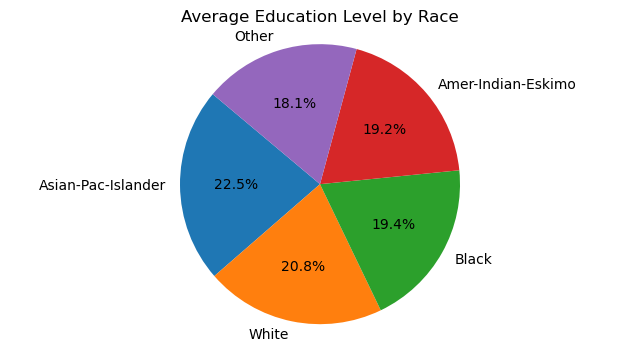

In [289]:
# Visuallizing the race with the highest education by percentage

plt.figure(figsize=(8,4))
plt.pie(race_education, labels=race_education.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Education Level by Race')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [267]:
# Checking the number of different marital-status whose income is <=50k or >50k

print(pd.crosstab(incomeii['marital-status'], incomeii['income']))


income                 <=50K  >50K
marital-status                    
Divorced                5857   666
Married-AF-spouse         20    14
Married-civ-spouse     12102  9851
Married-spouse-absent    543    57
Never-married          14801   722
Separated               1398    99
Widowed                 1317   126


In [273]:
# filtering the marital status that earns >50k

high_income = incomeii[incomeii['income'] == '>50K']

print(high_income)


       age         workclass  final-weight     education  education-num  \
7       52  Self-emp-not-inc        209642       HS-grad              9   
8       31           Private         45781       Masters             14   
9       42           Private        159449     Bachelors             13   
10      37           Private        280464  Some-college             10   
11      30         State-gov        141297     Bachelors             13   
...    ...               ...           ...           ...            ...   
48813   60           Private        117909     Assoc-voc             11   
48815   38           Private        149347       Masters             14   
48816   43         Local-gov         23157       Masters             14   
48822   40           Private        202168   Prof-school             15   
48841   35      Self-emp-inc        182148     Bachelors             13   

           marital-status       occupation   relationship                race  \
7      Married-civ

C:\Users\Blossom\AppData\Local\Temp\ipykernel_11348\3526322278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_income, x='marital-status', order=high_income['marital-status'].value_counts().index, palette='bright')


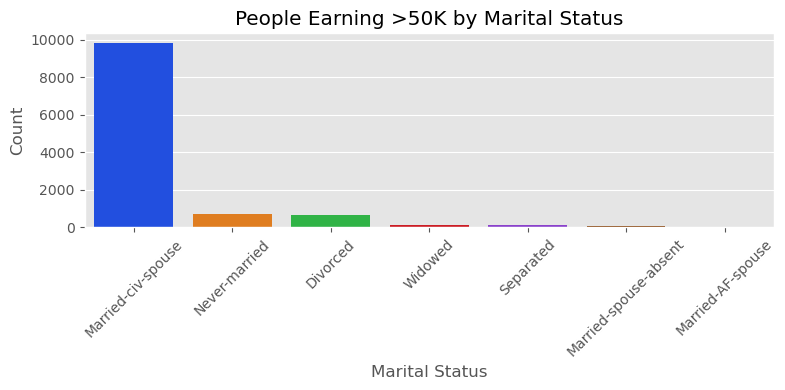

In [373]:
#  A chart of differnt marital-status that earns >50k
plt.figure(figsize=(8,4))
sns.countplot(data=high_income, x='marital-status', order=high_income['marital-status'].value_counts().index, palette='bright')
plt.title('People Earning >50K by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
style.use('ggplot')
plt.show()


In [333]:
#  Filtreing women data
women_data = incomeii[incomeii['sex'] == 'Female']
print(women_data)

       age workclass  final-weight     education  education-num  \
4       28   Private        338409     Bachelors             13   
5       37   Private        284582       Masters             14   
6       49   Private        160187           9th              5   
8       31   Private         45781       Masters             14   
12      23   Private        122272     Bachelors             13   
...    ...       ...           ...           ...            ...   
48821   27   Private        430340  Some-college             10   
48827   55   Private        224655       HS-grad              9   
48828   38   Private        247547     Assoc-voc             11   
48834   25   Private        350977       HS-grad              9   
48837   39   Private        215419     Bachelors             13   

              marital-status       occupation   relationship   race     sex  \
4         Married-civ-spouse   Prof-specialty           Wife  Black  Female   
5         Married-civ-spouse  Exec-ma

In [335]:
# Checking to see the top occupation done by women
top_occupation_women = women_data['occupation'].value_counts()
print(top_occupation_women)

occupation
Adm-clerical         3750
Other-service        2683
Prof-specialty       2225
Sales                1933
Exec-managerial      1740
Machine-op-inspct     799
Tech-support          560
Craft-repair          321
Handlers-cleaners     253
Priv-house-serv       222
Transport-moving      125
Protective-serv       122
Farming-fishing        95
Name: count, dtype: int64


C:\Users\Blossom\AppData\Local\Temp\ipykernel_11348\943430202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occupation_women.head(10).values, y=top_occupation_women.head(10).index, palette='deep')


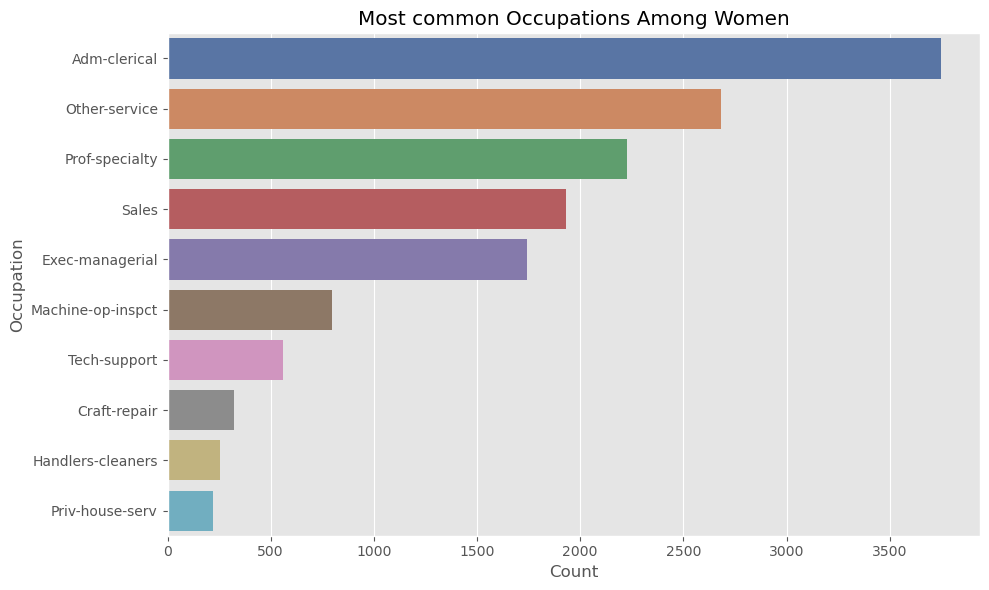

In [371]:
# Visualiztion to show the top occupation done by women
plt.figure(figsize=(10,6))
style.use('ggplot')
sns.barplot(x=top_occupation_women.head(10).values, y=top_occupation_women.head(10).index, palette='deep')
plt.title('Most common Occupations Among Women')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

In [349]:
# count the ocupation that has the highest number of income >50k

# Filter rows where income is >50K
occupation_income = incomeii[incomeii['income'] == '>50K']

# Count the number of people in each occupation
occupation_income_counts = occupation_income['occupation'].value_counts()
print(occupation_income_counts)

occupation
Exec-managerial      2896
Prof-specialty       2750
Sales                1468
Craft-repair         1375
Adm-clerical          765
Transport-moving      479
Tech-support          416
Machine-op-inspct     369
Protective-serv       308
Other-service         201
Farming-fishing       172
Handlers-cleaners     138
Armed-Forces            4
Priv-house-serv         3
Name: count, dtype: int64


C:\Users\Blossom\AppData\Local\Temp\ipykernel_11348\4134573831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_income_counts.index, y=occupation_income_counts.values, palette='viridis')


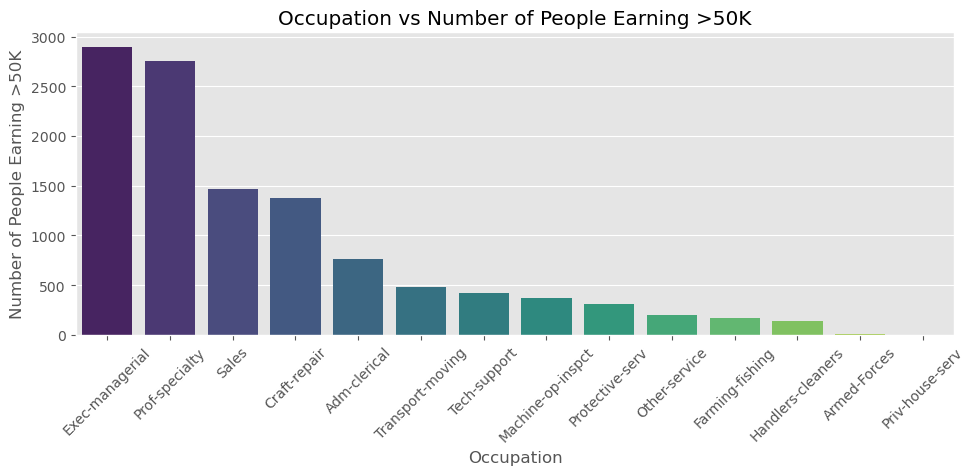

In [375]:
# Visualizing the ocupation that has the highest number of income >50k

plt.figure(figsize=(10, 4))
sns.barplot(x=occupation_income_counts.index, y=occupation_income_counts.values, palette='viridis')
plt.xlabel('Occupation')
style.use('ggplot')
plt.ylabel('Number of People Earning >50K')
plt.title('Occupation vs Number of People Earning >50K')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [377]:
# Checking if those earning >50K work significantly more hours
incomeii.groupby('income')['hours-per-week'].describe()

count       mean        std  min   25%   50%   75%   max
income                                                            
<=50K   34386.0  39.391613  11.982718  1.0  38.0  40.0  40.0  99.0
>50K    11344.0  45.692084  10.793304  1.0  40.0  40.0  50.0  99.0

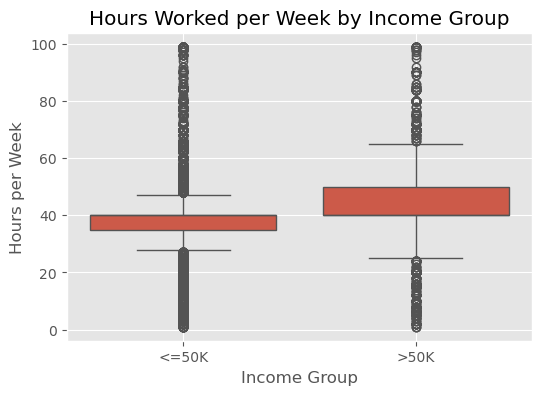

In [385]:
# Visualizing if those earning >50K work significantly more hours
plt.figure(figsize=(6,4))
sns.boxplot(x='income', y='hours-per-week', data=income)
plt.title('Hours Worked per Week by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

### **Data pre-proprecssing**

In [398]:
# Separating my numerical columns from my dataset so I can scale them
num_columns = incomeii.select_dtypes(include=['number'])


In [400]:
# Viewiing the numerical columns that I separated
num_columns.head()

age  final-weight  education-num  capital-gain  capital-loss  \
0   39         77516             13          2174             0   
1   50         83311             13             0             0   
2   38        215646              9             0             0   
3   53        234721              7             0             0   
4   28        338409             13             0             0   

   hours-per-week  
0              40  
1              13  
2              40  
3              40  
4              40

In [394]:
#  Scaling my Dataset using Normalization

# intializing my MinMaxScaler
scaling = MinMaxScaler(feature_range = (0,1))


In [402]:
# Using fit_transform on my numerical columns
scaled = scaling.fit_transform(num_columns)

In [404]:
print(scaled)

[[0.30136986 0.04335003 0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.04727376 0.8        0.         0.         0.12244898]
 [0.28767123 0.1368765  0.53333333 0.         0.         0.39795918]
 ...
 [0.28767123 0.24476203 0.8        0.         0.         0.5       ]
 [0.36986301 0.04766648 0.8        0.05455055 0.         0.39795918]
 [0.24657534 0.11419533 0.8        0.         0.         0.60204082]]


In [406]:
# Fixing my scaled columns so it can be easily understood

# Converting my scaled columns from NumPy array to pandas DataFrame
scaled_df = pd.DataFrame(scaled, columns=num_columns.columns)

# Visualizing my new scaled dataframe
scaled_df.head()

age  final-weight  education-num  capital-gain  capital-loss  \
0  0.301370      0.043350       0.800000       0.02174           0.0   
1  0.452055      0.047274       0.800000       0.00000           0.0   
2  0.287671      0.136877       0.533333       0.00000           0.0   
3  0.493151      0.149792       0.400000       0.00000           0.0   
4  0.150685      0.219998       0.800000       0.00000           0.0   

   hours-per-week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959

In [410]:
# Chexking to see if the scaled columns were applied
incomeii.head()

age         workclass  final-weight  education  education-num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   
2   38           Private        215646    HS-grad              9   
3   53           Private        234721       11th              7   
4   28           Private        338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [412]:
# Replacing the index of my scaled columns to match the ones in the parent Dataset

# Reseting the index of my scaled_df to match incomeii
scaled_df.index = incomeii.index

# Replacing the original numerical columns in incomeii
incomeii[num_columns.columns] = scaled_df

# Visualizing my updated dataset
incomeii.head()


age         workclass  final-weight  education  education-num  \
0  0.301370         State-gov      0.043350  Bachelors       0.800000   
1  0.452055  Self-emp-not-inc      0.047274  Bachelors       0.800000   
2  0.287671           Private      0.136877    HS-grad       0.533333   
3  0.493151           Private      0.149792       11th       0.400000   
4  0.150685           Private      0.219998  Bachelors       0.800000   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0       0.02174           0.0        0.397959  United-States  <=50K  
1       0.00000           0.0        0.122449  United-States  <=50K  
2       0.00000           0.0        0.397959  United-States  <=50K  
3       0.00000           0.0        0.397959  United-States  <=50K  
4       0.00000           0.0        0.397959           Cuba  <=50K

In [426]:
# Separating my categorical columns from my dataset so I can encode them
cat_columns = incomeii.select_dtypes(include=['object', 'category']).columns


In [432]:
# visualizing the categorical columns I separated
print(cat_columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [446]:
# encoding my categorical variables using OneHotEncoder

# Initializng my OneHotEncoder
encode_cat = OneHotEncoder(sparse_output = False)

# Using fit_transform on my categorical columns
encoded = encode_cat.fit_transform(incomeii[cat_columns])

In [452]:
# Fixing my encoded columns so it can be easily understood

# Converting my encoded columns from NumPy array to pandas DataFrame
encoded_df = pd.DataFrame(encoded, columns=encode_cat.get_feature_names_out(cat_columns))


# Visualizing my new encoded dataframe
encoded_df.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                    0.0                  0.0                0.0   
1                    0.0                  0.0                0.0   
2                    0.0                  0.0                1.0   
3                    0.0                  0.0                1.0   
4                    0.0                  0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                     0.0                         0.0                  1.0   
1                     0.0                         1.0                  0.0   
2                     0.0                         0.0                  0.0   
3                     0.0                         0.0                  0.0   
4                     0.0                         0.0                  0.0   

   workclass_Without-pay  education_10th  education_11th  education_12th  ...  \
0                    0.0             0.0             0.0             0.0  ...   
1                    0.0             0.0             0.0             0.0  ...   
2                    0.0             0.0             0.0             0.0  ...   
3                    0.0             0.0             1.0             0.0  ...   
4                    0.0             0.0             0.0             0.0  ...   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                      0.0                   0.0                    0.0   
1                      0.0                   0.0                    0.0   
2                      0.0                   0.0                    0.0   
3                      0.0                   0.0                    0.0   
4                      0.0                   0.0                    0.0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   

   native-country_United-States  native-country_Vietnam  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           0.0                     0.0   

   native-country_Yugoslavia  income_<=50K  income_>50K  
0                        0.0           1.0          0.0  
1                        0.0           1.0          0.0  
2                        0.0           1.0          0.0  
3                        0.0           1.0          0.0  
4                        0.0           1.0          0.0  

[5 rows x 101 columns]

In [492]:
# Merginging my scaled_df and my encoded_df

incomeiii = pd.concat([encoded_df, scaled_df], axis = 1)

incomeiii.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                    0.0                  0.0                0.0   
1                    0.0                  0.0                0.0   
2                    0.0                  0.0                1.0   
3                    0.0                  0.0                1.0   
4                    0.0                  0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                     0.0                         0.0                  1.0   
1                     0.0                         1.0                  0.0   
2                     0.0                         0.0                  0.0   
3                     0.0                         0.0                  0.0   
4                     0.0                         0.0                  0.0   

   workclass_Without-pay  education_10th  education_11th  education_12th  ...  \
0                    0.0             0.0             0.0             0.0  ...   
1                    0.0             0.0             0.0             0.0  ...   
2                    0.0             0.0             0.0             0.0  ...   
3                    0.0             0.0             1.0             0.0  ...   
4                    0.0             0.0             0.0             0.0  ...   

   native-country_Vietnam  native-country_Yugoslavia  income_<=50K  \
0                     0.0                        0.0           1.0   
1                     0.0                        0.0           1.0   
2                     0.0                        0.0           1.0   
3                     0.0                        0.0           1.0   
4                     0.0                        0.0           1.0   

   income_>50K       age  final-weight  education-num  capital-gain  \
0          0.0  0.301370      0.043350       0.800000       0.02174   
1          0.0  0.452055      0.047274       0.800000       0.00000   
2          0.0  0.287671      0.136877       0.533333       0.00000   
3          0.0  0.493151      0.149792       0.400000       0.00000   
4          0.0  0.150685      0.219998       0.800000       0.00000   

   capital-loss  hours-per-week  
0           0.0        0.397959  
1           0.0        0.122449  
2           0.0        0.397959  
3           0.0        0.397959  
4           0.0        0.397959  

[5 rows x 107 columns]

### **Data_Modelling**

In [514]:
# Separating my dataset into features and labels

# Features: all columns except 'income_>50K'
X = incomeiii.drop(['income_>50K'], axis=1)

# Labels: just the 'income' column
y = incomeiii[ 'income_>50K']

In [516]:
# Checking to see the shape of my y variable
y.shape

(45730,)

In [518]:
# Splitting my data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [520]:
# Checking if my y_train shape is equal to my X_train shape
y_train.shape[0] == X_train.shape[0]

True

In [555]:
# Training my model
# creating an instance of my model
incomeiii_model = LogisticRegression(max_iter = 500, multi_class = "ovr")

# fitting my model
incomeiii_model.fit(X_train, y_train)

C:\Users\Blossom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='ovr')

In [557]:
# Making predictions
y_pred = incomeiii_model.predict(X_test)

# Viewing my predicted values
print(y_pred)

[0. 0. 0. ... 1. 0. 0.]


In [559]:
# Fixing my  y_test index
y_test = y_test.reset_index(drop = True)

# viewing my actual value
print(y_test)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9141    0.0
9142    0.0
9143    1.0
9144    0.0
9145    0.0
Name: income_>50K, Length: 9146, dtype: float64


### **Model Evaluation**

In [561]:
# Evaluating my dataset using accuracy
accuracy_score(y_test, y_pred)

1.0

In [563]:
# Evaluating my dataset using precision_score
precision_score(y_test, y_pred, average='weighted')

1.0

In [565]:
# Evaluating my dataset using recall_score
recall_score(y_test, y_pred, average='weighted')

1.0

In [567]:
# Evaluating my dataset using confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6840,    0],
       [   0, 2306]], dtype=int64)

### **Summary**

#### **Some of the insights I got from the analysis**

- Asian-Pac-Islander is the race with the highest education coverng about (22.5%) of the entire population
- Married-civ-spouse is the marital status with the highest number of spouse (9,851) earning >50K
- Adm-clerical is the top occupation done by women. with a total number of (3,750) women in this occupation
- Exec-managerial Occupation, is the occupation  that has the highest number of people (2,896) earning >50k.
- Individuals that work more hours tend to earn >50k. This implies that the hours worked, has an impact on the amount earned.
  

#### **Recommendation**

Model Performance and Recommendations:
- A Logistic Regression model was trained and evaluated using accuracy, precision, recall, and a confusion matrix.

- The model achieved reasonable accuracy, but precision and recall could likely be improved with better feature engineering (e.g., combining rare categories).

- Confusion matrix showed that while the model distinguishes between classes, there is room for better performance, especially for minority class detection.

